### The following Models were trained and evaluated:

- Logistic Regression
- Random Forest
- Deep Learning (with tensorflow)
- XGB Classifier

Random Forest, Deep Learning and XGB Classifier had siimilar accuracy scores (with SMOTE applied).
The Deep Learniing model takes a little longer to process and uses up more memory so this model was excluded. In the end RF and XGB had similar performance so either of them would have been suffice. In this case I choose XGB and this will be the model deployed.

Note, there is always the potential to improve the performance of models by hyperparameter tuning and/or increasing the size of the dataset, etc..

In [53]:
import pandas as pd
import numpy as np
import sklearn
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [54]:
# Updated CSV with important features only
df = pd.read_csv('new_HR.csv')

In [55]:
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,...,MonthlyIncome,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,3,Sales Executive,...,5993,8,Yes,1,0,8,1,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,2,Research Scientist,...,5130,1,No,4,1,10,3,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,2,Laboratory Technician,...,2090,6,Yes,2,0,7,3,0,0,0


In [56]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [57]:
df.shape

(1470, 22)

### Encode categorical variables

In [58]:
get_dummies = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']

In [59]:
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})

In [60]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

**get dummies**

In [61]:
for var in get_dummies:
    df =  pd.concat([df, pd.get_dummies(df[var], prefix=var, drop_first=True)], axis=1)
df.drop(labels=get_dummies, axis=1, inplace=True)

In [62]:
df.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='ob

In [63]:
df.head(2)

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,2,3,4,5993,8,1,...,0,0,0,0,0,0,1,0,0,1
1,49,0,8,1,3,2,2,5130,1,0,...,0,0,0,0,0,1,0,0,1,0


In [68]:
y = df['Attrition']

In [69]:
X = df.drop('Attrition', axis=1)

### Scale the Data

In [70]:
scaler = MinMaxScaler()

In [71]:
X = scaler.fit_transform(X)

### Split the Data

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
Xos_train, Xos_test, yos_train, yos_test = train_test_split(X_os, y_os, test_size=0.25, random_state=42)

In [75]:
# Note, using fit_resample instead of fit_sample

sm = SMOTE(random_state=0)
X_os,y_os=sm.fit_resample(X,y)

# TRAIN AND EVALUATE A XGB CLASSIFIER MODEL 

**Using SMOTE**

In [76]:
md_XGB_os = XGBClassifier()
md_XGB_os.fit(Xos_train, yos_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
XGB_pred_os = md_XGB_os.predict(Xos_test)

In [78]:
print(confusion_matrix(y_true=yos_test, y_pred=XGB_pred_os))

[[297  14]
 [ 31 275]]


In [79]:
print(classification_report(yos_test, XGB_pred_os))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       311
           1       0.95      0.90      0.92       306

    accuracy                           0.93       617
   macro avg       0.93      0.93      0.93       617
weighted avg       0.93      0.93      0.93       617



**Feature Importance**

In [80]:
md_XGB_os.feature_importances_

array([0.01263913, 0.01133264, 0.0180393 , 0.02731654, 0.0368844 ,
       0.02501121, 0.01418492, 0.01747726, 0.09618007, 0.01357195,
       0.06779551, 0.01580965, 0.02770511, 0.02754096, 0.01227575,
       0.01718086, 0.01296715, 0.00492952, 0.00441022, 0.00576235,
       0.00746254, 0.01817282, 0.0102696 , 0.01672543, 0.01001117,
       0.02415109, 0.01888418, 0.01511261, 0.11556903, 0.18537553,
       0.01609724, 0.03013032, 0.03453914, 0.01352251, 0.01496238],
      dtype=float32)

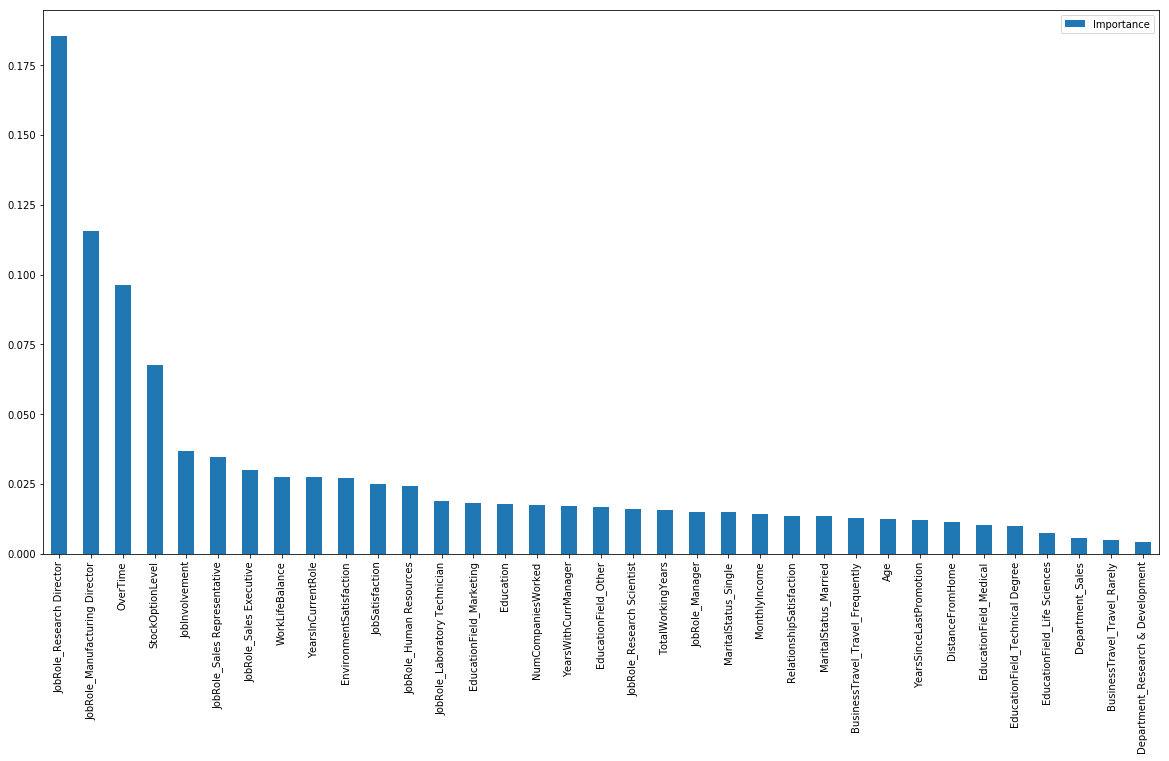

In [82]:
df_index = df.drop('Attrition', axis=1)
importance = pd.DataFrame(data= md_XGB_os.feature_importances_, index=df_index.columns, columns=['Importance'])
abs(importance).sort_values('Importance',ascending=False).plot.bar(figsize=(20,10))